In [2]:
import numpy as np
import matplotlib.pyplot as plt; plt.ion()
import os, cv2

def read_pixels(folder, verbose = False):
    '''
    Reads 3-D pixel value of the top left corner of each image in folder
    and returns an n x 3 matrix X containing the pixel values 
    '''  
    n = len(next(os.walk(folder))[2]) # number of files
    X = np.empty([n, 3])
    i = 0

    if verbose:
        fig, ax = plt.subplots()
        h = ax.imshow(np.random.randint(255, size=(28,28,3)).astype('uint8'))

    for filename in os.listdir(folder):  
        # read image
        # img = plt.imread(os.path.join(folder,filename), 0)
        img = cv2.imread(os.path.join(folder,filename))
        # convert from BGR (opencv convention) to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # store pixel rgb value
        X[i] = img[0,0].astype(np.float64)/255
        i += 1

        # display
        if verbose:
            h.set_data(img)
            ax.set_title(filename)
            fig.canvas.flush_events()
            plt.show()

    return X

In [3]:
folder = 'data/training'
X1 = read_pixels(folder+'/red', verbose = False)
X2 = read_pixels(folder+'/green')
X3 = read_pixels(folder+'/blue')
y1, y2, y3 = np.full(X1.shape[0],1), np.full(X2.shape[0], 2), np.full(X3.shape[0],3)


In [4]:
X, y = np.concatenate((X1,X2,X3)), np.concatenate((y1,y2,y3))

print(y.shape)
print(X.shape)

(3694,)
(3694, 3)


In [4]:
from pixel_classifier import PixelClassifier

In [5]:
myPixelClassifier = PixelClassifier()
weigths = myPixelClassifier.set_distibution_parameters(X, y, X1, X2, X3, y1, y2, y3)

Learning Gaussian parameters.....
Learning Gaussian parameters done....


In [6]:
folder = 'data/validation/blue'
  
X = read_pixels(folder)
y = myPixelClassifier.classify(X)

In [7]:
y = np.array(y)
print('Precision: %f' % (sum(y==3)/y.shape[0]))

Precision: 0.674699


In [10]:
import cv2
from matplotlib import pyplot as plt

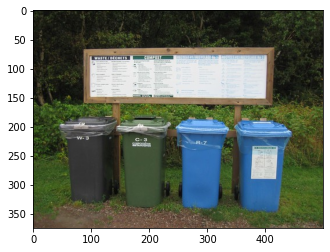

In [11]:
img = cv2.imread("0002.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows, cols, channels = img.shape
plt.imshow(img)

In [12]:
img = img.astype(np.float64)/255

In [13]:
img = np.reshape(img,(rows*cols,channels))

In [14]:
y = myPixelClassifier.classify(img)

In [17]:
segmentation = np.copy(y)
seg = np.where(segmentation==3, 1, 0)
seg = seg.reshape(rows, cols)

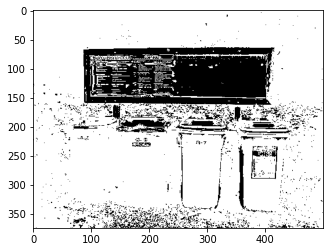

In [19]:
plt.imshow(seg, cmap='gray')

In [1]:
from pixel_classifier import MultiClassLogistricRegression

In [7]:
multilogistic = MultiClassLogistricRegression(300, 1e-3)
weigths = multilogistic.train(X, y)

AttributeError: 'MultiClassLogistricRegression' object has no attribute 'class_labels'